In [1]:
import numpy as np
import pandas as pd

In [2]:
articles_dataset = pd.read_csv("H&M Fashion/articles.csv")

In [3]:
articles_dataset.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
customers_dataset = pd.read_csv("H&M Fashion/customers.csv")

In [5]:
customers_dataset.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [6]:
transactions_dataset = pd.read_csv("H&M Fashion/transactions_train.csv")

In [7]:
transactions_dataset.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [8]:
# Convert the date to datetime64
transactions_dataset['t_dat'] = pd.to_datetime(transactions_dataset['t_dat'], format='%Y-%m-%d')
  
# Filter data between two dates
transactions_dataset_filtered = transactions_dataset.loc[(transactions_dataset['t_dat'] >= '2020-09-01')]

In [9]:
transactions_dataset_filtered.head()

,t_dat,customer_id,article_id,price,sales_channel_id
30990055,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,777148006,0.013542,1
30990056,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,835801001,0.018627,1
30990057,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,923134005,0.012695,1
30990058,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,865929003,0.016932,1
30990059,2020-09-01,0005ed68483efa39644c45185550a82dd09acb07622acb...,863646004,0.033881,1


In [10]:
transactions_dataset_filtered.describe()

,article_id,price,sales_channel_id
count,7.982690e+05,798269.000000,798269.000000
mean,8.084430e+08,0.033577,1.686316
std,1.335333e+08,0.022457,0.463990
min,1.087750e+08,0.000322,1.000000
25%,7.600840e+08,0.016932,1.000000
50%,8.603950e+08,0.031627,2.000000
75%,8.997490e+08,0.042356,2.000000
max,9.562170e+08,0.506780,2.000000


In [11]:
len(transactions_dataset_filtered.t_dat)

798269

In [12]:
merged = pd.merge(articles_dataset, transactions_dataset_filtered, on="article_id")

In [13]:
merged.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,t_dat,customer_id,price,sales_channel_id
0,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,2020-09-03,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,0.008458,2
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,2020-09-03,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,0.008458,2
2,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,2020-09-03,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,0.008458,2
3,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,2020-09-03,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,0.008458,2
4,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,2020-09-13,65cdeef43054eeade12fb0c774c4ac2e4bc051b5305253...,0.008458,2


In [14]:
merged.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no,price,sales_channel_id
count,7.982690e+05,798269.000000,798269.000000,7.982690e+05,798269.000000,798269.000000,798269.000000,798269.000000,798269.000000,798269.000000,798269.000000,798269.000000,798269.000000
mean,8.084430e+08,808443.005315,251.667519,1.010015e+06,23.468632,3.020067,7.303440,2736.556668,2.857087,33.740628,1009.411830,0.033577,1.686316
std,1.335333e+08,133533.349219,63.006204,5.456417e+00,25.120849,1.359856,4.670952,2072.450035,5.739384,22.642323,6.187463,0.022457,0.463990
min,1.087750e+08,108775.000000,-1.000000,1.010001e+06,1.000000,1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000,0.000322,1.000000
25%,7.600840e+08,760084.000000,253.000000,1.010016e+06,9.000000,2.000000,5.000000,1612.000000,1.000000,15.000000,1003.000000,0.016932,1.000000
50%,8.603950e+08,860395.000000,262.000000,1.010016e+06,10.000000,4.000000,5.000000,1676.000000,1.000000,23.000000,1009.000000,0.031627,2.000000
75%,8.997490e+08,899749.000000,272.000000,1.010016e+06,23.000000,4.000000,11.000000,3608.000000,2.000000,55.000000,1016.000000,0.042356,2.000000
max,9.562170e+08,956217.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000,0.506780,2.000000


In [15]:
len(merged)

798269

In [16]:
merged.groupby("customer_id")['price'].sum().sort_values(ascending=False).head()

customer_id
e4ea6ece6706e9c119a3640e09e842f5ae7d62a6b546d4f2448e08def4bd7283    7.005390
3860b5e65d48bb509d89e6b21ec0458e13c75eab2e95f53ea2269fafc01a5567    4.677898
f894f1fa24e7f19f7e2586a30780e34b084854417c4675af49ffbd349153fc0a    4.241915
77db96923d20d40532eba0020b55cd91eb51358885c2d698a2805e79481f64a1    3.526644
a9948bc6e5234770cfe5669f8f9b5c4261e87ccb1846d78436cd68997d01f618    3.506322
Name: price, dtype: float64

In [17]:
merged.groupby("customer_id")['article_id'].count().sort_values(ascending=False).head()

customer_id
65cb62c794232651e2ac711faa11c2b4e3d41d5f3b59b50bee3ffde1d5776644    147
1426b606af826fa9568b6fe75629d10bb6ff7ea40f93908c43113d991e512bd5    108
3860b5e65d48bb509d89e6b21ec0458e13c75eab2e95f53ea2269fafc01a5567    104
1be8d175dddc1efc0abd9d10c95d1bc5ecef4d649ed8b0a7b4c878f4e2a425ac    102
d1c5629d6d7e39067cef9d1092e44016ea94889fa36624fad0123c39de72edb1     96
Name: article_id, dtype: int64

In [18]:
merged.groupby("article_id")['customer_id'].count().sort_values(ascending=False).head()

article_id
751471001    1982
909370001    1868
918522001    1702
924243001    1683
918292001    1682
Name: customer_id, dtype: int64

In [19]:
merged.groupby("article_id")['price'].sum().sort_values(ascending=False).head()

article_id
909014001    72.486441
918522001    70.512915
924243001    69.887085
918292001    69.654085
448509014    68.942000
Name: price, dtype: float64

In [20]:
merged.nunique()

article_id                       26252
product_code                     13751
prod_name                        14111
product_type_no                    120
product_type_name                  119
product_group_name                  17
graphical_appearance_no             29
graphical_appearance_name           29
colour_group_code                   48
colour_group_name                   48
perceived_colour_value_id            7
perceived_colour_value_name          7
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      268
department_name                    224
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          54
section_name                        54
garment_group_no                    21
garment_group_name                  21
detail_desc                      13029
t_dat                    

In [21]:
merged_simplified = merged[["customer_id", "article_id"]]

In [22]:
merged_simplified["article_id_2"] = merged_simplified["article_id"]
f = {'customer_id': 'first', 'article_id': 'first', 'article_id_2': 'count'}
merged_simplified = merged_simplified.groupby(['customer_id', 'article_id'], as_index=False).agg(f)
merged_simplified_new = merged_simplified.rename({'article_id_2': 'quantity'}, axis='columns')
merged_simplified_new.head()

C:\Users\varun\AppData\Local\Temp\ipykernel_37288\834924369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_simplified["article_id_2"] = merged_simplified["article_id"]


,customer_id,article_id,quantity
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601043,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,794321007,1
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,448509014,1
3,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,719530003,1
4,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,685814001,3


In [23]:
merged_simplified_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705504 entries, 0 to 705503
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  705504 non-null  object
 1   article_id   705504 non-null  int64 
 2   quantity     705504 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 16.1+ MB


In [24]:
merged_simplified_new.describe()

,article_id,quantity
count,7.055040e+05,705504.000000
mean,8.090555e+08,1.131488
std,1.310301e+08,0.470392
min,1.087750e+08,1.000000
25%,7.602950e+08,1.000000
50%,8.597760e+08,1.000000
75%,8.988890e+08,1.000000
max,9.562170e+08,61.000000


In [25]:
len(merged_simplified_new)

705504

In [26]:
merged_simplified_new = merged_simplified_new.drop(['quantity'], axis=1)

In [27]:
merged_simplified_new.head()

,customer_id,article_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601043
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,794321007
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,448509014
3,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,719530003
4,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,685814001


In [28]:
labels = merged_simplified_new
number_of_potential_classes = labels['article_id'].nunique()
print(number_of_potential_classes)

26252


In [29]:
merged_df = merged.merge(customers_dataset, on='customer_id')
merged_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,t_dat,customer_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,2020-09-03,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,0.008458,2,NaN,NaN,ACTIVE,NONE,24.0,0a3e303d58d6d17902848de50706dda0cecf1610f19903...
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,2020-09-03,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,0.008458,2,NaN,NaN,ACTIVE,NONE,24.0,0a3e303d58d6d17902848de50706dda0cecf1610f19903...
2,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,2020-09-03,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,0.008458,2,NaN,NaN,ACTIVE,NONE,24.0,0a3e303d58d6d17902848de50706dda0cecf1610f19903...
3,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,2020-09-03,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,0.008458,2,NaN,NaN,ACTIVE,NONE,24.0,0a3e303d58d6d17902848de50706dda0cecf1610f19903...
4,372860002,372860,7p Basic Shaftless,302,Socks,Socks & Tights,1010016,Solid,10,White,...,2020-09-03,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,0.013542,2,NaN,NaN,ACTIVE,NONE,24.0,0a3e303d58d6d17902848de50706dda0cecf1610f19903...


In [30]:
pivot_column = "department_no"
matrix_df = merged_df[["customer_id", pivot_column]]
matrix_df.head()

,customer_id,department_no
0,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,1676
1,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,1676
2,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,1676
3,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,1676
4,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,3611


In [31]:
matrix_df["duplicate"] = matrix_df[pivot_column]
f = {'customer_id': 'first', pivot_column: 'first', 'duplicate': 'count'}
matrix_df = matrix_df.groupby(['customer_id', pivot_column], as_index=False).agg(f)
matrix_df = matrix_df.rename({'duplicate': 'quantity'}, axis='columns')
matrix_df.head()

C:\Users\varun\AppData\Local\Temp\ipykernel_37288\2816286557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix_df["duplicate"] = matrix_df[pivot_column]


,customer_id,department_no,quantity
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,1212,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,8397,1
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,1747,2
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,5833,3
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,1626,2


In [32]:
pivot_df = matrix_df.pivot(index='customer_id', columns=pivot_column, values='quantity')

In [33]:
pivot_df.head()

department_no,1201,1212,1222,1241,1244,1310,1313,1322,1334,1336,...,8815,8852,8888,8917,8956,9020,9984,9985,9986,9989
customer_id,,,,,,,,,,,,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000172a9c322560c849754ffbdfdb2180d408aa7176b943f957804686be8e1f0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
len(pivot_df)

189510

In [35]:
#pivot_df = pivot_df.rename_axis(None, axis=1)
pivot_df = pivot_df.rename_axis(None, axis=1).reset_index()

In [36]:
pivot_df = pivot_df.fillna(0)
pivot_df.head()

,customer_id,1201,1212,1222,1241,1244,1310,1313,1322,1334,...,8815,8852,8888,8917,8956,9020,9984,9985,9986,9989
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
pivot_df.iloc[:, 1:len(pivot_df.columns)] = pivot_df.iloc[:, 1:len(pivot_df.columns)].astype(int)
pivot_df.head()

,customer_id,1201,1212,1222,1241,1244,1310,1313,1322,1334,...,8815,8852,8888,8917,8956,9020,9984,9985,9986,9989
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
colour_df = merged_df[["customer_id", "colour_group_code"]]
colour_df.head()

,customer_id,colour_group_code
0,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,10
1,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,10
2,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,10
3,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,10
4,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,10


In [39]:
colour_df["colour_group_code_2"] = colour_df["colour_group_code"]
f = {'customer_id': 'first', 'colour_group_code': 'first', 'colour_group_code_2': 'count'}
colour_df = colour_df.groupby(['customer_id', 'colour_group_code'], as_index=False).agg(f)
colour_df = colour_df.rename({'colour_group_code_2': 'count'}, axis='columns')
colour_df.head()

C:\Users\varun\AppData\Local\Temp\ipykernel_37288\310321360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colour_df["colour_group_code_2"] = colour_df["colour_group_code"]


,customer_id,colour_group_code,count
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,93,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,15,1
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,9,1
3,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,72,1
4,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,9,3


In [40]:
idx=colour_df.groupby(by='customer_id')['count'].idxmax()
colour_df_max=colour_df.loc[idx,]

In [41]:
colour_df_max.head()

,customer_id,colour_group_code,count
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,93,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,15,1
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,9,1
4,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,9,3
5,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,9,3


In [42]:
colour_df_max = colour_df_max.drop(['count'], axis=1)
colour_df_max.head()

,customer_id,colour_group_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,93
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,15
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,9
4,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,9
5,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,9


In [43]:
colour_df_max = colour_df_max.rename(columns={"colour_group_code": "fave_colour"})
colour_df_max.head()

,customer_id,fave_colour
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,93
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,15
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,9
4,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,9
5,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,9


In [44]:
colour_df_2 = (colour_df.sort_values('count', ascending=False).groupby('customer_id', as_index=False).nth(1))

In [45]:
colour_df_2.head()

,customer_id,colour_group_code,count
442348,e4ea6ece6706e9c119a3640e09e842f5ae7d62a6b546d4...,13,26
197869,65cb62c794232651e2ac711faa11c2b4e3d41d5f3b59b5...,73,26
450961,e9669ec59cd303a2bd90e8ffd58f8690ac35c2ca1745db...,51,24
323561,a6c1c70b77da6e6a7979b8d3b16704081c4748420ab7db...,10,21
217587,70089b0e65a805d777e5299daaa0bf5623e04d5eb3d74c...,10,20


In [46]:
colour_df_2 = colour_df_2.drop(['count'], axis=1)
colour_df_2.head()

,customer_id,colour_group_code
442348,e4ea6ece6706e9c119a3640e09e842f5ae7d62a6b546d4...,13
197869,65cb62c794232651e2ac711faa11c2b4e3d41d5f3b59b5...,73
450961,e9669ec59cd303a2bd90e8ffd58f8690ac35c2ca1745db...,51
323561,a6c1c70b77da6e6a7979b8d3b16704081c4748420ab7db...,10
217587,70089b0e65a805d777e5299daaa0bf5623e04d5eb3d74c...,10


In [47]:
colour_df_2 = colour_df_2.rename(columns={"colour_group_code": "2nd_fave_colour"})
colour_df_2.head()

,customer_id,2nd_fave_colour
442348,e4ea6ece6706e9c119a3640e09e842f5ae7d62a6b546d4...,13
197869,65cb62c794232651e2ac711faa11c2b4e3d41d5f3b59b5...,73
450961,e9669ec59cd303a2bd90e8ffd58f8690ac35c2ca1745db...,51
323561,a6c1c70b77da6e6a7979b8d3b16704081c4748420ab7db...,10
217587,70089b0e65a805d777e5299daaa0bf5623e04d5eb3d74c...,10


In [48]:
pattern_df = merged_df[["customer_id", "graphical_appearance_no"]]
pattern_df.head()

,customer_id,graphical_appearance_no
0,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,1010016
1,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,1010016
2,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,1010016
3,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,1010016
4,a995fb9182c93e9c70f134b3bf493cce1b666950af280b...,1010016


In [49]:
pattern_df["graphical_appearance_no_2"] = pattern_df["graphical_appearance_no"]
f = {'customer_id': 'first', 'graphical_appearance_no': 'first', 'graphical_appearance_no_2': 'count'}
pattern_df = pattern_df.groupby(['customer_id', 'graphical_appearance_no'], as_index=False).agg(f)
pattern_df = pattern_df.rename({'graphical_appearance_no_2': 'count'}, axis='columns')
pattern_df.head()

C:\Users\varun\AppData\Local\Temp\ipykernel_37288\3359792797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pattern_df["graphical_appearance_no_2"] = pattern_df["graphical_appearance_no"]


,customer_id,graphical_appearance_no,count
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,1010026,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,1010016,1
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,1010016,2
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,1010016,3
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,1010001,1


In [50]:
idx=pattern_df.groupby(by='customer_id')['count'].idxmax()
pattern_df_max=pattern_df.loc[idx,]

In [51]:
pattern_df_max.head()

,customer_id,graphical_appearance_no,count
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,1010026,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,1010016,1
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,1010016,2
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,1010016,3
6,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,1010016,7


In [52]:
pattern_df_max = pattern_df_max.drop(['count'], axis=1)
pattern_df_max.head()

,customer_id,graphical_appearance_no
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,1010026
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,1010016
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,1010016
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,1010016
6,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,1010016


In [53]:
pattern_df = pattern_df_max.rename(columns={"graphical_appearance_no": "fave_pattern"})
pattern_df.head()

,customer_id,fave_pattern
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,1010026
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,1010016
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,1010016
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,1010016
6,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,1010016


In [54]:
df = pivot_df.merge(colour_df_max, on='customer_id')
df.head()

,customer_id,1201,1212,1222,1241,1244,1310,1313,1322,1334,...,8852,8888,8917,8956,9020,9984,9985,9986,9989,fave_colour
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,93
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [55]:
df = df.merge(colour_df_2, on='customer_id', how="left")
df.head()

,customer_id,1201,1212,1222,1241,1244,1310,1313,1322,1334,...,8888,8917,8956,9020,9984,9985,9986,9989,fave_colour,2nd_fave_colour
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,93,NaN
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,9.0
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,NaN
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,91.0


In [56]:
df = df.fillna("Unknown")

In [57]:
df = df.merge(pattern_df, on='customer_id', how="left")
df.head()

,customer_id,1201,1212,1222,1241,1244,1310,1313,1322,1334,...,8917,8956,9020,9984,9985,9986,9989,fave_colour,2nd_fave_colour,fave_pattern
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,93,Unknown,1010026
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15,Unknown,1010016
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,9.0,1010016
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,Unknown,1010016
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,91.0,1010016


In [58]:
df = df.merge(customers_dataset, on='customer_id', how="left")
df.head()

,customer_id,1201,1212,1222,1241,1244,1310,1313,1322,1334,...,9989,fave_colour,2nd_fave_colour,fave_pattern,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,1,0,0,0,0,0,0,0,...,0,93,Unknown,1010026,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,0,0,0,0,0,0,0,...,0,15,Unknown,1010016,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0,0,0,0,0,0,0,0,0,...,0,9,9.0,1010016,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0,0,0,0,0,0,0,0,0,...,0,9,Unknown,1010016,NaN,NaN,ACTIVE,NONE,45.0,4ca377c955c160866d5662b33aa1af44d54d4342fb8bfa...
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0,0,0,0,0,0,0,0,0,...,0,9,91.0,1010016,1.0,1.0,ACTIVE,Regularly,44.0,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...


In [59]:
df["age_binned"] = pd.qcut(df["age"], 2, labels=["young", "old"])
df.head()

,customer_id,1201,1212,1222,1241,1244,1310,1313,1322,1334,...,fave_colour,2nd_fave_colour,fave_pattern,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_binned
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,1,0,0,0,0,0,0,0,...,93,Unknown,1010026,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,old
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,0,0,0,0,0,0,0,...,15,Unknown,1010016,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,young
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0,0,0,0,0,0,0,0,0,...,9,9.0,1010016,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...,young
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0,0,0,0,0,0,0,0,0,...,9,Unknown,1010016,NaN,NaN,ACTIVE,NONE,45.0,4ca377c955c160866d5662b33aa1af44d54d4342fb8bfa...,old
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0,0,0,0,0,0,0,0,0,...,9,91.0,1010016,1.0,1.0,ACTIVE,Regularly,44.0,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...,old


In [60]:
df = df.drop(['age'], axis=1)

In [61]:
df = pd.get_dummies(df, columns=["club_member_status", "age_binned"])
df = pd.get_dummies(df, columns=["fave_colour", "2nd_fave_colour", "fave_pattern"])
df.shape

(189510, 404)

In [62]:
df['fashion_news_frequency'] = df['fashion_news_frequency'].replace('NONE', 0)

In [63]:
df['fashion_news_frequency'] = df['fashion_news_frequency'].replace('Monthly', 1)

In [64]:
df['fashion_news_frequency'] = df['fashion_news_frequency'].replace('REGULARLY', 2)

In [65]:
df.head()

,customer_id,1201,1212,1222,1241,1244,1310,1313,1322,1334,...,fave_pattern_1010020,fave_pattern_1010021,fave_pattern_1010022,fave_pattern_1010023,fave_pattern_1010024,fave_pattern_1010025,fave_pattern_1010026,fave_pattern_1010027,fave_pattern_1010028,fave_pattern_1010029
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
abt_df = df

In [67]:
all_customers_in_prior_transactions_df = abt_df.copy()

In [68]:
df = abt_df.merge(labels, on='customer_id')
df.head()

,customer_id,1201,1212,1222,1241,1244,1310,1313,1322,1334,...,fave_pattern_1010021,fave_pattern_1010022,fave_pattern_1010023,fave_pattern_1010024,fave_pattern_1010025,fave_pattern_1010026,fave_pattern_1010027,fave_pattern_1010028,fave_pattern_1010029,article_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,568601043
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,794321007
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,448509014
3,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,719530003
4,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,685814001


In [69]:
df = df.drop(['customer_id'], axis=1)
df.head()

,1201,1212,1222,1241,1244,1310,1313,1322,1334,1336,...,fave_pattern_1010021,fave_pattern_1010022,fave_pattern_1010023,fave_pattern_1010024,fave_pattern_1010025,fave_pattern_1010026,fave_pattern_1010027,fave_pattern_1010028,fave_pattern_1010029,article_id
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,568601043
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,794321007
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,448509014
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,719530003
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,685814001


In [70]:
min_count = 930
cust_counts = df['article_id'].value_counts()
cust_list = cust_counts[cust_counts > min_count].index.tolist()
df = df[df['article_id'].isin(cust_list)]

In [71]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

df = downsample(df, "article_id")

In [72]:
df.head()

,1201,1212,1222,1241,1244,1310,1313,1322,1334,1336,...,fave_pattern_1010021,fave_pattern_1010022,fave_pattern_1010023,fave_pattern_1010024,fave_pattern_1010025,fave_pattern_1010026,fave_pattern_1010027,fave_pattern_1010028,fave_pattern_1010029,article_id
0,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,448509014
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,448509014
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,448509014
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,448509014
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,448509014


In [73]:
fulltable = df.copy()

In [74]:
df = fulltable

In [75]:
df = pd.get_dummies(df)
df.fillna(0)
n_classes = df["article_id"].nunique()
print(n_classes)

21


In [76]:
y = df.pop('article_id').values 
X = df.values   

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import os
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.utils.multiclass import unique_labels
from sklearn.svm import SVC
from random import choices
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/3)

In [79]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.ticker as mticker
mnb = GaussianNB()

feature_names = df.columns
mi = dict()

i_scores = mutual_info_classif(X_train, y_train)

for i,j in zip(feature_names,i_scores):
    mi[i]=j
 
df_i = pd.DataFrame.from_dict(mi,orient='index',columns=['I-Gain'])
df_i.sort_values(by=['I-Gain'],ascending=False,inplace=True)
df_i.head(15)

ValueError: Input X contains NaN.

In [ ]:
acc_scores = []
for kk in range(1, X.shape[1]+1):
    FS_trans = SelectKBest(mutual_info_classif, k=kk).fit(X_train, y_train)
    X_tR_new = FS_trans.transform(X_train)
    X_tS_new = FS_trans.transform(X_test)
    hm_NB = mnb.fit(X_tR_new, y_train)
    y_dash = hm_NB.predict(X_tS_new)
    acc = accuracy_score(y_test, y_dash)
    acc_scores.append(acc)

df_i['Accuracy'] = acc_scores
df_i.head(10)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df.isnull().values.any()

In [ ]:
df.isnull().sum().sum()

In [ ]:
print(list(df.columns))

In [ ]:
# df['club_member_status_PRE-CREATE'].isnull().values.any()

In [ ]:
df = df.drop(['FN', 'Active', 'fashion_news_frequency', 'postal_code'], axis=1)

In [ ]:
similarity_scores = cosine_similarity(df)

In [ ]:
similarity_scores.shape

In [ ]:
similarity_scores

In [ ]:
def recommend(user):
    # index fetch
    index = np.where(df.index==user)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = customers_dataset[customers_dataset['customer_id'] == df.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('customer_id')['article_id'].values))
#         item.extend(list(df.drop_duplicates('customer_id')['Book-Author'].values))
#         item.extend(list(temp_df.drop_duplicates('customer_id')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [ ]:
recommend(10)

In [10]:
from pickle import load
from pickle import dump
import numpy as np
import pandas as pd
from dateutil.parser import parse
import os
from collections import Counter
import operator
from random import sample

In [33]:
custDetails = customers_dataset
trancDetails = transactions_dataset_filtered.reset_index()
artiDetails = articles_dataset

In [34]:
custDetails.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [35]:
artiDetails.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [39]:
trancDetails.head()

,index,t_dat,customer_id,article_id,price,sales_channel_id,Day,Month,Year,Weekday,year_month
0,30990055,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,777148006,0.013542,1,01,09,2020,1,2020_09
1,30990056,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,835801001,0.018627,1,01,09,2020,1,2020_09
2,30990057,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,923134005,0.012695,1,01,09,2020,1,2020_09
3,30990058,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,865929003,0.016932,1,01,09,2020,1,2020_09
4,30990059,2020-09-01,0005ed68483efa39644c45185550a82dd09acb07622acb...,863646004,0.033881,1,01,09,2020,1,2020_09


In [40]:
#Parsing  the date
trancDetails['Day'] = trancDetails['t_dat'].apply(lambda x: str(x).split("-")[2])
# Parsing the Month
trancDetails['Month'] = trancDetails['t_dat'].apply(lambda x: str(x).split("-")[1])
# Getting the year
trancDetails['Year'] = trancDetails['t_dat'].apply(lambda x: str(x).split("-")[0])
# Getting year and month together as one feature
trancDetails['Day'] = trancDetails['Day'].apply(lambda x: str(x).split(" ")[0])
trancDetails['Weekday'] = trancDetails['t_dat'].apply(lambda x: x.weekday())
trancDetails.head()

,index,t_dat,customer_id,article_id,price,sales_channel_id,Day,Month,Year,Weekday,year_month
0,30990055,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,777148006,0.013542,1,01,09,2020,1,2020_09
1,30990056,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,835801001,0.018627,1,01,09,2020,1,2020_09
2,30990057,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,923134005,0.012695,1,01,09,2020,1,2020_09
3,30990058,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,865929003,0.016932,1,01,09,2020,1,2020_09
4,30990059,2020-09-01,0005ed68483efa39644c45185550a82dd09acb07622acb...,863646004,0.033881,1,01,09,2020,1,2020_09


In [41]:
# Getting year and month together as one feature
trancDetails['year_month'] = trancDetails['Year'] + "_" +trancDetails['Month']
trancDetails.head()

,index,t_dat,customer_id,article_id,price,sales_channel_id,Day,Month,Year,Weekday,year_month
0,30990055,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,777148006,0.013542,1,01,09,2020,1,2020_09
1,30990056,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,835801001,0.018627,1,01,09,2020,1,2020_09
2,30990057,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,923134005,0.012695,1,01,09,2020,1,2020_09
3,30990058,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,865929003,0.016932,1,01,09,2020,1,2020_09
4,30990059,2020-09-01,0005ed68483efa39644c45185550a82dd09acb07622acb...,863646004,0.033881,1,01,09,2020,1,2020_09


In [51]:
list(trancDetails['customer_id'].head(1))

['0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94']

In [54]:
temp = trancDetails.groupby("customer_id")['article_id'].count()

In [55]:
trancDetails = pd.merge(trancDetails, temp, on="customer_id")
trancDetails.head()

,index,t_dat,customer_id,article_id_x,price,sales_channel_id,Day,Month,Year,Weekday,year_month,article_id_y
0,30990055,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,777148006,0.013542,1,01,09,2020,1,2020_09,10
1,30990056,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,835801001,0.018627,1,01,09,2020,1,2020_09,10
2,30990057,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,923134005,0.012695,1,01,09,2020,1,2020_09,10
3,30990058,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,865929003,0.016932,1,01,09,2020,1,2020_09,10
4,31140482,2020-09-05,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,572998013,0.042356,2,05,09,2020,5,2020_09,10


In [58]:
trancDetails = trancDetails.rename(columns={"article_id_x": "article_id", "article_id_y": "Quantity"})

In [59]:
trancDetails.head()

,index,t_dat,customer_id,article_id,price,sales_channel_id,Day,Month,Year,Weekday,year_month,Quantity
0,30990055,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,777148006,0.013542,1,01,09,2020,1,2020_09,10
1,30990056,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,835801001,0.018627,1,01,09,2020,1,2020_09,10
2,30990057,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,923134005,0.012695,1,01,09,2020,1,2020_09,10
3,30990058,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,865929003,0.016932,1,01,09,2020,1,2020_09,10
4,31140482,2020-09-05,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,572998013,0.042356,2,05,09,2020,5,2020_09,10


In [60]:
# Creating gross value column
trancDetails['grossValue'] = trancDetails["Quantity"] * trancDetails["price"]
trancDetails.head()

,index,t_dat,customer_id,article_id,price,sales_channel_id,Day,Month,Year,Weekday,year_month,Quantity,grossValue
0,30990055,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,777148006,0.013542,1,01,09,2020,1,2020_09,10,0.135424
1,30990056,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,835801001,0.018627,1,01,09,2020,1,2020_09,10,0.186271
2,30990057,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,923134005,0.012695,1,01,09,2020,1,2020_09,10,0.126949
3,30990058,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,865929003,0.016932,1,01,09,2020,1,2020_09,10,0.169322
4,31140482,2020-09-05,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,572998013,0.042356,2,05,09,2020,5,2020_09,10,0.423559


In [61]:
import pandas as pd
import lifetimes

In [62]:
# Converting data to RFM format
RfmAgeTrain = lifetimes.utils.summary_data_from_transaction_data(trancDetails, 'customer_id', 't_dat', 'grossValue')
RfmAgeTrain

,frequency,recency,T,monetary_value
customer_id,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0.0,0.0,17.0,0.000000
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.0,0.0,7.0,0.000000
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,0.0,0.0,8.0,0.000000
000172a9c322560c849754ffbdfdb2180d408aa7176b943f957804686be8e1f0,0.0,0.0,18.0,0.000000
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,3.0,13.0,21.0,0.587232
...,...,...,...,...
fffd0248a95c2e49fee876ff93598e2e20839e51b9b7678aab75d9e8f9f3c6c8,0.0,0.0,8.0,0.000000
fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd0eb40a3065971d0e01,0.0,0.0,6.0,0.000000
fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20e02ce5d1e58a8f700b,2.0,13.0,13.0,0.465822


In [63]:
RfmAgeTrain = RfmAgeTrain.reset_index()
RfmAgeTrain

,customer_id,frequency,recency,T,monetary_value
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,17.0,0.000000
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,7.0,0.000000
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0.0,0.0,8.0,0.000000
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0.0,0.0,18.0,0.000000
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,3.0,13.0,21.0,0.587232
...,...,...,...,...,...
189505,fffd0248a95c2e49fee876ff93598e2e20839e51b9b767...,0.0,0.0,8.0,0.000000
189506,fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd...,0.0,0.0,6.0,0.000000
189507,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,2.0,13.0,13.0,0.465822
189508,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,16.0,0.000000


In [65]:
user_recency = RfmAgeTrain[['customer_id','recency']]
user_recency.head()

,customer_id,recency
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0.0
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0.0
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,13.0


In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

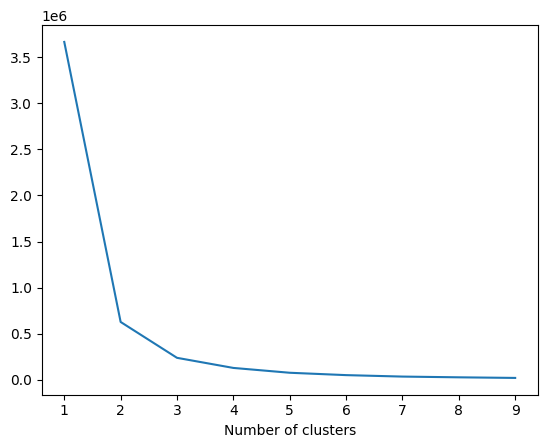

In [67]:
# Fitting a kmeans algorithm for the Recency score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Initialize a dictionary to store sum of squared error
sse = {}
recency = user_recency[['recency']]

# Loop through different cluster combinations
for k in range(1,10):
    # Fit the Kmeans model using the iterated cluster value
    kmeans = KMeans(n_clusters=k,max_iter=2000).fit(recency)
    # Store the cluster against the sum of squared error for each cluster formation   
    sse[k] = kmeans.inertia_
    
# Plotting all the clusters
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of clusters")
plt.show()

In [68]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(user_recency[['recency']])
user_recency['RecencyCluster'] = kmeans.predict(user_recency[['recency']])
user_recency

,customer_id,recency,RecencyCluster
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0.0,0
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0.0,0
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,13.0,1
...,...,...,...
189505,fffd0248a95c2e49fee876ff93598e2e20839e51b9b767...,0.0,0
189506,fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd...,0.0,0
189507,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,13.0,1
189508,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0


In [69]:
user_recency.sort_values(by='recency',ascending=False).reset_index(drop=True)

,customer_id,recency,RecencyCluster
0,d2d96362887463afcef2eb257f0e5cb41f102977ddb125...,21.0,1
1,8e29a466ff9d0594712c171db5ec076deaa5466e0998c3...,21.0,1
2,0de1db0c4125f9023609157ed41e2530ec93f998387ad4...,21.0,1
3,503923bb5b9b7c44ebdaeb3a7ef7276a608be93cf1476b...,21.0,1
4,77f3b2054754a1df27ceabde91aa890dddeaaa232258ee...,21.0,1
...,...,...,...
189505,60b113fb4cec2779dcca364dde532efafde5ef14ee38ff...,0.0,0
189506,60b11ea36a43322b2f320e6ce2ce50ece3970946a7e1de...,0.0,0
189507,60b16ce595e0184dfce04aaae3ffd5a0272d564c111d3a...,0.0,0
189508,60b25238fb137532962a27fb0b1afb6a0fa1a836719365...,0.0,0


In [70]:
user_recency.groupby('RecencyCluster')['recency'].mean().reset_index()

,RecencyCluster,recency
0,0,0.152553
1,1,15.363242
2,2,7.135431


In [71]:
def order_cluster(cluster_field_name,target_field_name,data,ascending):    
    # Group the data on the clusters and summarise the target field(recency/frequency/monetary) based on the mean value
    data_new = data.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    # Sort the data based on the values of the target field
    data_new = data_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    # Create a new column called index for storing the sorted index values
    data_new['index'] = data_new.index
    # Merge the summarised data onto the original data set so that the index is mapped to the cluster
    data_final = pd.merge(data,data_new[[cluster_field_name,'index']],on=cluster_field_name)
    # From the final data drop the cluster name as the index is the new cluster
    data_final = data_final.drop([cluster_field_name],axis=1)
    # Rename the index column to cluster name
    data_final = data_final.rename(columns={'index':cluster_field_name})
    return data_final

In [72]:
user_recency = order_cluster('RecencyCluster','recency',user_recency,False)
user_recency.head()

,customer_id,recency,RecencyCluster
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,2
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,2
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0.0,2
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0.0,2
4,0001f8cef6b9702d54abf66fd89eb21014bf98567065a9...,0.0,2


In [73]:
user_recency.groupby('RecencyCluster')['recency'].mean().reset_index()

,RecencyCluster,recency
0,0,15.363242
1,1,7.135431
2,2,0.152553


In [76]:
def clusterSorter(target_field_name,ascending):    
    # Make the subset data frame using the required feature
    user_variable = RfmAgeTrain[['customer_id',target_field_name]]
    # let us take four clusters indicating 4 quadrants
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(user_variable[[target_field_name]])
    # Create the cluster field name from the target field name
    cluster_field_name = target_field_name + 'Cluster'
    # Create the clusters
    user_variable[cluster_field_name] = kmeans.predict(user_variable[[target_field_name]])
    # Sort and reset index
    user_variable.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    # Sort the data frame according to cluster values
    user_variable = order_cluster(cluster_field_name,target_field_name,user_variable,ascending)
    return user_variable

In [77]:
# Implementing for user frequency
user_freqency = clusterSorter('frequency',True)
user_freqency.groupby('frequencyCluster')['frequency'].mean().reset_index()

,frequencyCluster,frequency
0,0,0.000000
1,1,1.000000
2,2,2.239244
3,3,4.951306


In [78]:
# Implementing for monetary values
user_monetary = clusterSorter('monetary_value',True)
user_monetary.groupby('monetary_valueCluster')['monetary_value'].mean().reset_index()

,monetary_valueCluster,monetary_value
0,0,0.103798
1,1,4.033062
2,2,15.619177
3,3,54.214834


In [79]:
# Merging the individual data frames with the main data frame
RfmAgeTrain = pd.merge(RfmAgeTrain,user_monetary[["customer_id",'monetary_valueCluster']],on='customer_id')
RfmAgeTrain = pd.merge(RfmAgeTrain,user_freqency[["customer_id",'frequencyCluster']],on='customer_id')
RfmAgeTrain = pd.merge(RfmAgeTrain,user_recency[["customer_id",'RecencyCluster']],on='customer_id')
RfmAgeTrain.head()

,customer_id,frequency,recency,T,monetary_value,monetary_valueCluster,frequencyCluster,RecencyCluster
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,17.0,0.000000,0,0,2
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,7.0,0.000000,0,0,2
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0.0,0.0,8.0,0.000000,0,0,2
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0.0,0.0,18.0,0.000000,0,0,2
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,3.0,13.0,21.0,0.587232,0,2,0


In [80]:
RfmAgeTrain['OverallScore'] = RfmAgeTrain['RecencyCluster'] + RfmAgeTrain['frequencyCluster'] + RfmAgeTrain['monetary_valueCluster']
RfmAgeTrain

,customer_id,frequency,recency,T,monetary_value,monetary_valueCluster,frequencyCluster,RecencyCluster,OverallScore
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,17.0,0.000000,0,0,2,2
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,7.0,0.000000,0,0,2,2
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0.0,0.0,8.0,0.000000,0,0,2,2
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0.0,0.0,18.0,0.000000,0,0,2,2
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,3.0,13.0,21.0,0.587232,0,2,0,2
...,...,...,...,...,...,...,...,...,...
189505,fffd0248a95c2e49fee876ff93598e2e20839e51b9b767...,0.0,0.0,8.0,0.000000,0,0,2,2
189506,fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd...,0.0,0.0,6.0,0.000000,0,0,2,2
189507,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,2.0,13.0,13.0,0.465822,0,2,0,2
189508,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,16.0,0.000000,0,0,2,2


In [81]:
RfmAgeTrain.groupby('OverallScore')['frequency','recency','monetary_value'].mean().reset_index()

,OverallScore,frequency,recency,monetary_value
0,1,1.000000,14.994362,0.422012
1,2,0.150960,1.060116,0.067701
2,3,1.562333,5.212734,0.981186
3,4,2.359807,6.816644,4.248770
4,5,2.980296,7.433498,13.042273
5,6,3.148148,7.000000,36.390293


In [82]:
RfmAgeTrain.groupby('OverallScore')['frequency'].count().reset_index()

,OverallScore,frequency
0,1,5676
1,2,162553
2,3,17952
3,4,2896
4,5,406
5,6,27


In [83]:
RfmAgeTrain['Segment'] = 'Q1'
RfmAgeTrain.loc[(RfmAgeTrain.OverallScore == 0) ,'Segment']='Q2'
RfmAgeTrain.loc[(RfmAgeTrain.OverallScore == 1),'Segment']='Q2'
RfmAgeTrain.loc[(RfmAgeTrain.OverallScore == 2),'Segment']='Q3'
RfmAgeTrain.loc[(RfmAgeTrain.OverallScore == 4),'Segment']='Q4'
RfmAgeTrain.loc[(RfmAgeTrain.OverallScore == 5),'Segment']='Q4'
#RfmAgeTrain.loc[(RfmAgeTrain.OverallScore == 6),'Segment']='Q4'

RfmAgeTrain

,customer_id,frequency,recency,T,monetary_value,monetary_valueCluster,frequencyCluster,RecencyCluster,OverallScore,Segment
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,17.0,0.000000,0,0,2,2,Q3
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,7.0,0.000000,0,0,2,2,Q3
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0.0,0.0,8.0,0.000000,0,0,2,2,Q3
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,0.0,0.0,18.0,0.000000,0,0,2,2,Q3
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,3.0,13.0,21.0,0.587232,0,2,0,2,Q3
...,...,...,...,...,...,...,...,...,...,...
189505,fffd0248a95c2e49fee876ff93598e2e20839e51b9b767...,0.0,0.0,8.0,0.000000,0,0,2,2,Q3
189506,fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd...,0.0,0.0,6.0,0.000000,0,0,2,2,Q3
189507,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,2.0,13.0,13.0,0.465822,0,2,0,2,Q3
189508,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,16.0,0.000000,0,0,2,2,Q3


In [84]:
RfmAgeTrain.groupby('Segment')['frequency','recency','monetary_value'].mean().reset_index()

,Segment,frequency,recency,monetary_value
0,Q1,1.564714,5.215418,1.034362
1,Q2,1.000000,14.994362,0.422012
2,Q3,0.150960,1.060116,0.067701
3,Q4,2.436099,6.892489,5.329982


In [86]:
# Merging the customer details with the segment
trancDetails = pd.merge(trancDetails, RfmAgeTrain, on=['customer_id'], how='left')
trancDetails.head()

,index,t_dat,customer_id,article_id,price,sales_channel_id,Day,Month,Year,Weekday,...,grossValue,frequency,recency,T,monetary_value,monetary_valueCluster,frequencyCluster,RecencyCluster,OverallScore,Segment
0,30990055,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,777148006,0.013542,1,01,09,2020,1,...,0.135424,3.0,13.0,21.0,0.587232,0,2,0,2,Q3
1,30990056,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,835801001,0.018627,1,01,09,2020,1,...,0.186271,3.0,13.0,21.0,0.587232,0,2,0,2,Q3
2,30990057,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,923134005,0.012695,1,01,09,2020,1,...,0.126949,3.0,13.0,21.0,0.587232,0,2,0,2,Q3
3,30990058,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,865929003,0.016932,1,01,09,2020,1,...,0.169322,3.0,13.0,21.0,0.587232,0,2,0,2,Q3
4,31140482,2020-09-05,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,572998013,0.042356,2,05,09,2020,5,...,0.423559,3.0,13.0,21.0,0.587232,0,2,0,2,Q3


In [87]:
# Feature engineering of the customer details data frame
# Get the date  as a seperate column
trancDetails['Date'] = trancDetails['t_dat'].apply(lambda x: x.strftime("%d"))
# Converting date to float for easy comparison
trancDetails['Date']  = trancDetails['Date'] .astype('float64')
# Get the period of month column
trancDetails['monthPeriod'] = trancDetails['Date'].apply(lambda x: int(x > 15))

trancDetails.head()

,index,t_dat,customer_id,article_id,price,sales_channel_id,Day,Month,Year,Weekday,...,recency,T,monetary_value,monetary_valueCluster,frequencyCluster,RecencyCluster,OverallScore,Segment,Date,monthPeriod
0,30990055,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,777148006,0.013542,1,01,09,2020,1,...,13.0,21.0,0.587232,0,2,0,2,Q3,1.0,0
1,30990056,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,835801001,0.018627,1,01,09,2020,1,...,13.0,21.0,0.587232,0,2,0,2,Q3,1.0,0
2,30990057,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,923134005,0.012695,1,01,09,2020,1,...,13.0,21.0,0.587232,0,2,0,2,Q3,1.0,0
3,30990058,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,865929003,0.016932,1,01,09,2020,1,...,13.0,21.0,0.587232,0,2,0,2,Q3,1.0,0
4,31140482,2020-09-05,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,572998013,0.042356,2,05,09,2020,5,...,13.0,21.0,0.587232,0,2,0,2,Q3,5.0,0


In [90]:
# Aggregate the custDetails to get a distribution of rewards
rewardFull = trancDetails.groupby(['Segment','Month','monthPeriod','Day','article_id'])['Quantity'].agg('sum').reset_index()
rewardFull

,Segment,Month,monthPeriod,Day,article_id,Quantity
0,Q1,09,0,01,110065011,8
1,Q1,09,0,01,111565001,2
2,Q1,09,0,01,111586001,10
3,Q1,09,0,01,111593001,113
4,Q1,09,0,01,148033001,27
...,...,...,...,...,...,...
284321,Q4,09,1,22,946748001,19
284322,Q4,09,1,22,946764002,36
284323,Q4,09,1,22,946795001,15
284324,Q4,09,1,22,949198001,62


In [91]:
segments = list(rewardFull.Segment.unique())
print('segments',segments)
months = list(rewardFull.Month.unique())
print('months',months)
monthPeriod = list(rewardFull.monthPeriod.unique())
print('monthPeriod',monthPeriod)
days = list(rewardFull.Day.unique())
print('days',days)

segments ['Q1', 'Q2', 'Q3', 'Q4']
months ['09']
monthPeriod [0, 1]
days ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']


In [92]:
# Defining some dictionaries for storing the values
countDic = {} # Dictionary to store the count of products
polDic = {} # Dictionary to store the value distribution
rewDic = {} # Dictionary to store the reward distribution
recoCount = {} # Dictionary to store the recommendation counts

In [94]:
for seg in segments:
    for mon in months:
        for period in monthPeriod:
            for day in days:
                # Get the subset of the data
                subset1 = rewardFull[(rewardFull['Segment'] == seg) & (rewardFull['Month'] == mon) & (
                            rewardFull['monthPeriod'] == period) & (rewardFull['Day'] == day)]                
                # Check if the subset is valid
                if len(subset1) > 0:
                    # Iterate through each of the subset and get the products and its quantities
                    stateId = str(seg) + '_' + mon + '_' + str(period) + '_' + day
                    # Define a dictionary for the state ID
                    countDic[stateId] = {}                    
                    for i in range(len(subset1.article_id)):
                        countDic[stateId][subset1.iloc[i]['article_id']] = int(subset1.iloc[i]['Quantity'])
                        
len(countDic)

86

In [126]:
countDic.keys()

dict_keys(['Q1_09_0_01', 'Q1_09_0_02', 'Q1_09_0_03', 'Q1_09_0_04', 'Q1_09_0_05', 'Q1_09_0_06', 'Q1_09_0_07', 'Q1_09_0_08', 'Q1_09_0_09', 'Q1_09_0_10', 'Q1_09_0_11', 'Q1_09_0_12', 'Q1_09_0_13', 'Q1_09_0_14', 'Q1_09_0_15', 'Q1_09_1_16', 'Q1_09_1_17', 'Q1_09_1_18', 'Q1_09_1_19', 'Q1_09_1_20', 'Q1_09_1_21', 'Q1_09_1_22', 'Q2_09_0_01', 'Q2_09_0_02', 'Q2_09_0_03', 'Q2_09_0_04', 'Q2_09_0_05', 'Q2_09_0_06', 'Q2_09_0_07', 'Q2_09_0_08', 'Q2_09_0_09', 'Q2_09_0_10', 'Q2_09_0_13', 'Q2_09_0_14', 'Q2_09_0_15', 'Q2_09_1_16', 'Q2_09_1_17', 'Q2_09_1_18', 'Q2_09_1_19', 'Q2_09_1_20', 'Q2_09_1_21', 'Q2_09_1_22', 'Q3_09_0_01', 'Q3_09_0_02', 'Q3_09_0_03', 'Q3_09_0_04', 'Q3_09_0_05', 'Q3_09_0_06', 'Q3_09_0_07', 'Q3_09_0_08', 'Q3_09_0_09', 'Q3_09_0_10', 'Q3_09_0_11', 'Q3_09_0_12', 'Q3_09_0_13', 'Q3_09_0_14', 'Q3_09_0_15', 'Q3_09_1_16', 'Q3_09_1_17', 'Q3_09_1_18', 'Q3_09_1_19', 'Q3_09_1_20', 'Q3_09_1_21', 'Q3_09_1_22', 'Q4_09_0_01', 'Q4_09_0_02', 'Q4_09_0_03', 'Q4_09_0_04', 'Q4_09_0_05', 'Q4_09_0_06', 'Q4_09_0_

In [123]:
stateId = 'Q4_09_0_01'
#countDic[stateId]

In [99]:
from numpy.random import normal as GaussianDistribution

In [100]:
# Consolidate the rewards and value functions based on the quantities
for key in countDic.keys():    
    # First get the dictionary of products for a state
    prodCounts = countDic[key]
    polDic[key] = {}
    rewDic[key] = {}    
    # Update the policy values
    for pkey in prodCounts.keys():
        # Creating the value dictionary using a Gaussian process
        polDic[key][pkey] = GaussianDistribution(loc=prodCounts[pkey], scale=1, size=1)[0].round(2)
        # Creating a reward dictionary using a Gaussian process
        rewDic[key][pkey] = GaussianDistribution(loc=prodCounts[pkey], scale=1, size=1)[0].round(2)

In [107]:
#polDic[stateId]

In [108]:
#rewDic[stateId]

In [127]:
# Get the context of the customer. For the time being let us randomly select all the states
seg = sample(['Q1','Q2','Q3','Q4'],1)[0] # Sample the segment
mon = sample(['09'],1)[0] # Sample the month
monthPer = sample([0,1],1)[0] # sample the month period
day = sample(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'],1)[0] # Sample the day
# Get the state id by combining all these samples
stateId = str(seg) + '_' +  mon + '_' + str(monthPer) + '_' + day
print(stateId)

Q2_09_0_09


In [128]:
def collfinder(dictionary,stateId):
    # dictionary ; This is the dictionary where we check if the state exists
    # stateId : StateId to be checked    
    if stateId in dictionary.keys():        
        mycol = {}
        mycol[stateId] = dictionary[stateId]
    else:
        # Initialise the state Id in the dictionary
        dictionary[stateId] = {}
        # Return the state specific collection
        mycol = {}
        mycol[stateId] = dictionary[stateId]
        
    return mycol[stateId],mycol,dictionary

In [129]:
mypolDic,mypol,polDic = collfinder(polDic,stateId)

In [131]:
#mypol

In [132]:
# Check for the Reward Dictionary
myrewDic, staterew,rewDic = collfinder(rewDic,stateId)

In [134]:
#staterew

In [135]:
# Check for the Count Dictionary
myCount,quantityDic,countDic = collfinder(countDic,stateId)

In [136]:
#quantityDic

In [137]:
len(countDic)

86

In [138]:
# Initializing the recommendation dictionary
recoCountdic = {}
# Check the recommendation count dictionary
myrecoDic,recoCount,recoCountdic = collfinder(recoCountdic,stateId)

In [139]:
recoCountdic

{'Q2_09_0_09': {}}

In [140]:
from collections import OrderedDict

In [141]:
# Create a function to get a list of products for a certain segment
def segProduct(seg, nproducts,rewardFull):
    # Get the list of unique products for each segment
    seg_products = list(rewardFull[rewardFull['Segment'] == seg]['article_id'].unique())
    seg_products = sample(seg_products, nproducts)
    return seg_products

# This is the function to get the top n products based on value
def sortlist(nproducts, stateId,seg,mypol):
    # Get the top products based on the values and sort them from product with largest value to least
    topProducts = sorted(mypol[stateId].keys(), key=lambda kv: mypol[stateId][kv])[-nproducts:][::-1]
    # If the topProducts is less than the required number of products nproducts, sample the delta
    while len(topProducts) < nproducts:
        print("[INFO] top products less than required number of products")
        segProducts = segProduct(seg,(nproducts - len(topProducts)),rewardFull)
        newList = topProducts + segProducts
        # Finding unique products
        topProducts = list(OrderedDict.fromkeys(newList))
    return topProducts

# This is the function to create the number of products based on exploration and exploitation
def sampProduct(seg, nproducts, stateId, epsilon,mypol):
    # Initialise an empty list for storing the recommended products
    seg_products = []
    # Get the list of unique products for each segment
    Segment_products = list(rewardFull[rewardFull['Segment'] == seg]['article_id'].unique())
    # Get the list of top n products based on value
    topProducts = sortlist(nproducts, stateId,seg,mypol)
    # Start a loop to get the required number of products
    while len(seg_products) < nproducts:
        # First find a probability
        probability = np.random.rand()
        if probability >= epsilon:
            # print(topProducts)
            # The top product would be first product in the list
            prod = topProducts[0]
            # Append the selected product to the list
            seg_products.append(prod)
            # Remove the top product once appended
            topProducts.pop(0)
            # Ensure that seg_products is unique
            seg_products = list(OrderedDict.fromkeys(seg_products))
        else:
            # If the probability is less than epsilon value randomly sample one product
            prod = sample(Segment_products, 1)[0]
            seg_products.append(prod)
            # Ensure that seg_products is unique
            seg_products = list(OrderedDict.fromkeys(seg_products))
    return seg_products

In [143]:
# countDic[stateId]

In [144]:
# polDic[stateId]

In [145]:
# rewDic[stateId]

In [147]:
recoCountdic

{'Q2_09_0_09': {}}

In [148]:
def dicUpdater(prodList, stateId,countDic,recoCountdic,polDic,rewDic):
    print('product list',prodList)
    for prod in prodList:
        print('product',prod)
        # Check if the product is in the dictionary
        if prod in list(countDic[stateId].keys()):
            # Update the count by 1
            countDic[stateId][prod] += 1
            print('Count after update',countDic[stateId][prod])
        else:
            countDic[stateId][prod] = 1
            print('Count after update', countDic[stateId][prod])
        if prod in list(recoCountdic[stateId].keys()):            
            # Update the recommended products with 1
            recoCountdic[stateId][prod] += 1
            print('Recommendation Count after update', recoCountdic[stateId][prod])
        else:
            # Initialise the recommended products as 1
            recoCountdic[stateId][prod] = 1
            print('Recommendation Count after update', recoCountdic[stateId][prod])
        if prod not in list(polDic[stateId].keys()):
            # Initialise the value as 0
            polDic[stateId][prod] = 0
            print('Policy value after update', polDic[stateId][prod])
        if prod not in list(rewDic[stateId].keys()):            
            # Initialise the reward dictionary as 0
            rewDic[stateId][prod] = GaussianDistribution(loc=0, scale=1, size=1)[0].round(2)
            print('Reward value after update', rewDic[stateId][prod])
            
    # Return all the dictionaries after update
    return countDic,recoCountdic,polDic,rewDic

In [149]:
def dicAdder(prodList, stateId,countDic,recoCountdic,polDic,rewDic):
    countDic[stateId] = {}
    polDic[stateId] = {}
    recoCountdic[stateId] = {}
    rewDic[stateId] = {}
    print('product list', prodList)
    # Loop through the product list
    for prod in prodList:
        # Initialise the count as 1
        countDic[stateId][prod] = 1
        # Initialise the value as 0
        polDic[stateId][prod] = 0
        # Initialise the recommended products as 1
        recoCountdic[stateId][prod] = 1
        # Initialise the reward dictionary as 0
        rewDic[stateId][prod] = GaussianDistribution(loc=0, scale=1, size=1)[0].round(2)
    # Return all the dictionaries after update
    return countDic,recoCountdic,polDic,rewDic

In [150]:
nProducts = 10
epsilon=0.1

In [151]:
# Get the list of recommended products and update the dictionaries.The process is executed for a scenario when the context exists and does not exist
if len(mypolDic) > 0:    
    print("The context exists")
    # Implement the sampling of products based on exploration and exploitation
    seg_products = sampProduct(seg, nProducts , stateId, epsilon,mypol)
    # Update the dictionaries of values and rewards
    countDic,recoCountdic,polDic,rewDic = dicUpdater(seg_products, stateId,countDic,recoCountdic,polDic,rewDic)
else:
    print("The context dosent exist")
    # Get the list of relavant products
    seg_products = segProduct(seg, nProducts)
    # Add products to the value dictionary and rewards dictionary
    countDic,recoCountdic,polDic,rewDic = dicAdder(seg_products, stateId,countDic,recoCountdic,polDic,rewDic)

The context exists
product list [935892001, 706016001, 885951003, 936622001, 806131012, 905957001, 874754001, 889375002, 883307001, 512251004]
product 935892001
Count after update 57
Recommendation Count after update 1
product 706016001
Count after update 48
Recommendation Count after update 1
product 885951003
Count after update 47
Recommendation Count after update 1
product 936622001
Count after update 41
Recommendation Count after update 1
product 806131012
Count after update 41
Recommendation Count after update 1
product 905957001
Count after update 37
Recommendation Count after update 1
product 874754001
Count after update 35
Recommendation Count after update 1
product 889375002
Count after update 35
Recommendation Count after update 1
product 883307001
Count after update 29
Recommendation Count after update 1
product 512251004
Count after update 31
Recommendation Count after update 1


In [152]:
def custAction(segproducts):
    print('[INFO] getting the customer action')
    # Sample a value to get how many products will be clicked    
    click_number = np.random.choice(np.arange(0, 10), p=[0.50,0.35,0.10, 0.025, 0.015,0.0055, 0.002,0.00125,0.00124,0.00001])
    # Sample products which will be clicked based on click number
    click_list = sample(segproducts,click_number)

    # Sample for buy values    
    buy_number = np.random.choice(np.arange(0, 10), p=[0.70,0.15,0.10, 0.025, 0.015,0.0055, 0.002,0.00125,0.00124,0.00001])
    # Sample products which will be bought based on buy number
    buy_list = sample(segproducts,buy_number)

    return click_list,buy_list

In [163]:
click_list,buy_list = custAction(seg_products)
print(click_list)
print(buy_list)

[INFO] getting the customer action
[936622001, 806131012]
[905957001]


In [164]:
def getReward(loc):
    rew = GaussianDistribution(loc=loc, scale=1, size=1)[0].round(2)
    return rew

def saPolicy(rew, stateId, prod,polDic,recoCountdic):
    # This function gets the relavant algorithm for the policy update
    # Get the current value of the state
    print('Product inside policy update',prod)
    vcur = polDic[stateId][prod]
    print('Current value for the product in policy',vcur)
    # Get the counts of the current product
    n = recoCountdic[stateId][prod]
    print('Number of occurances of product',n)
    # Calculate the new value
    Incvcur = (1 / n) * (rew - vcur)
    print('policy value for the product in policy after updating vcur', Incvcur)
    return Incvcur

def valueUpdater(seg_products, loc,custList,stateId,rewDic,polDic,recoCountdic, remove=True):
    for prod in custList:       
        # Get the reward for the bought product. The reward will be centered around the defined reward for each action
        rew = getReward(loc)
        print('Reward',rew)
        # Update the reward in the reward dictionary
        rewDic[stateId][prod] += rew
        print('Reward value after customer action', rewDic[stateId][prod])
        # Update the policy based on the reward
        Incvcur = saPolicy(rew, stateId, prod,polDic,recoCountdic)
        print('increment value for the product before update',Incvcur)
        polDic[stateId][prod] += Incvcur
        print('Policy value after customer action', polDic[stateId][prod])
        # Remove the bought product from the product list
        if remove:
            seg_products.remove(prod)
    return seg_products,rewDic,polDic,recoCountdic

In [165]:
if len(buy_list) > 0:
    seg_products,rewDic,polDic,recoCountdic = valueUpdater(seg_products, 5, buy_list,stateId,rewDic,polDic,recoCountdic)
    # Repeat the same process for customer click
if len(click_list) > 0:
    seg_products,rewDic,polDic,recoCountdic = valueUpdater(seg_products, 1, click_list,stateId,rewDic,polDic,recoCountdic)
    # For those products not clicked or bought, give a penalty
if len(seg_products) > 0:
    custList = seg_products.copy()
    seg_products,rewDic,polDic,recoCountdic = valueUpdater(seg_products, -2, custList,stateId ,rewDic,polDic,recoCountdic, False)


Reward 5.11
Reward value after customer action 40.43
Product inside policy update 905957001
Current value for the product in policy 37.84
Number of occurances of product 1
policy value for the product in policy after updating vcur -32.730000000000004
increment value for the product before update -32.730000000000004
Policy value after customer action 5.109999999999999
Reward 1.2
Reward value after customer action 42.67
Product inside policy update 936622001
Current value for the product in policy 41.23
Number of occurances of product 1
policy value for the product in policy after updating vcur -40.029999999999994
increment value for the product before update -40.029999999999994
Policy value after customer action 1.2000000000000028
Reward 1.15
Reward value after customer action 41.03
Product inside policy update 806131012
Current value for the product in policy 40.15
Number of occurances of product 1
policy value for the product in policy after updating vcur -39.0
increment value for the

In [166]:
# https://colab.research.google.com/drive/1xWX4JQvlcx3mizwL4gB0THEyxw6LsXTL#scrollTo=v6cMKTZZXTq1

In [ ]:
def prepare_dataset(args_mut, kwargs):

    """
        Basic prepare dataset function. Automatically makes index linear, in ml20 movie indices look like:
        [1, 34, 123, 2000], recnn makes it look like [0,1,2,3] for you.
    """

    # get args
    frame_size = kwargs.get('frame_size')
    key_to_id = args_mut.base.key_to_id
    df = args_mut.df

    # rating range mapped from [0, 5] to [-5, 5]
    df['rating'] = try_progress_apply(df['rating'], lambda i: 2 * (i - 2.5))
    # id's tend to be inconsistent and sparse so they are remapped here
    df['movieId'] = try_progress_apply(df['movieId'], lambda i: key_to_id.get(i))
    users = df[['userId', 'movieId']].groupby(['userId']).size()
    users = users[users > frame_size].sort_values(ascending=False).index

    if pd.get_type() == "modin":
        df = df._to_pandas() # pandas groupby is sync and doesnt affect performance
    ratings = df.sort_values(by='timestamp').set_index('userId').drop('timestamp', axis=1).groupby('userId')

    # groupby user
    user_dict = {}

    def app(x):
        userid = (x.index[0])
        user_dict[userid] = {}
        user_dict[userid]['items'] = x['movieId'].values
        user_dict[userid]['ratings'] = x['rating'].values

    # collect
    try_progress_apply(ratings, app)

    # set args
    args_mut.user_dict = user_dict
    args_mut.users = users

    return args_mut, kwargs